# Bank Marketing Prediction Project
**Objective:** Build a machine learning model to predict whether a client will subscribe to a term deposit.

## Step 1: Data Loading
Load the dataset and inspect its structure.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pickle

# Load the dataset
data = pd.read_csv('bank-additional/bank-additional.csv', sep=';')

# Inspect the data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Step 2: Data Cleaning
Handle missing values, check for duplicates, and ensure data types are correct.

In [3]:
# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

# Display data types
print(data.dtypes)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
0
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


## Step 3: Data Preprocessing
Encode categorical variables and scale numerical features.

In [4]:
# Encode categorical variables using One-Hot Encoding
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Scale numerical features
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Define the preprocessed dataset (X for features, y for target)
X = data.drop('y_yes', axis=1)  # Features
y = data['y_yes']               # Target variable

# Save feature names after preprocessing
feature_names = X.columns
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

print("Feature names saved to 'feature_names.pkl'")

Feature names saved to 'feature_names.pkl'


## Step 4: Exploratory Data Analysis (EDA)
Visualize distributions, correlations, and relationships in the data.

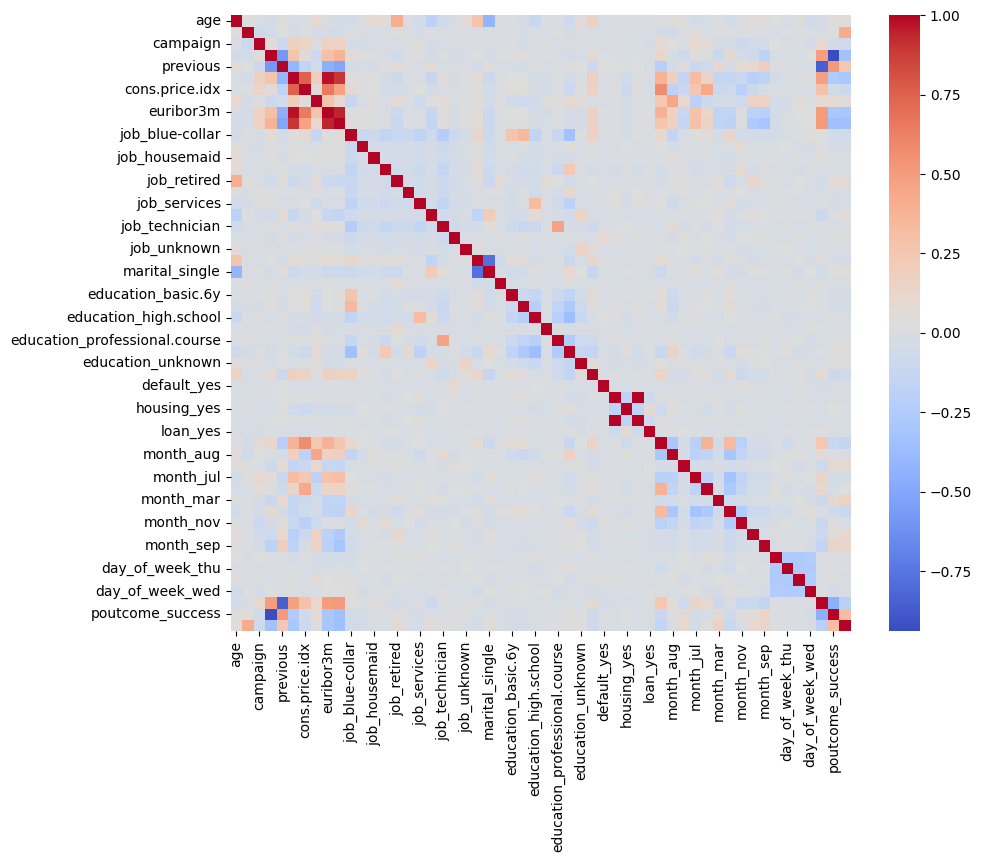

In [7]:
# Example EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.show()

## Step 5: Feature Selection
Use feature selection techniques to choose relevant features.

In [8]:
# Example: Feature selection using correlation threshold
correlation_threshold = 0.1
correlation_matrix = data.corr()
relevant_features = correlation_matrix.index[correlation_matrix['y_yes'].abs() > correlation_threshold]
print(relevant_features)

Index(['duration', 'pdays', 'previous', 'emp.var.rate', 'euribor3m',
       'nr.employed', 'contact_telephone', 'month_dec', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_nonexistent',
       'poutcome_success', 'y_yes'],
      dtype='object')


## Step 6: Model Selection
Train and evaluate multiple models.

In [26]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train-test split
X = data.drop('y_yes', axis=1)
y = data['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("K-Nearest Neighbors:")
print(classification_report(y_test, y_pred))

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred))

K-Nearest Neighbors:
              precision    recall  f1-score   support

       False       0.92      0.97      0.95       732
        True       0.60      0.34      0.43        92

    accuracy                           0.90       824
   macro avg       0.76      0.65      0.69       824
weighted avg       0.88      0.90      0.89       824

Logistic Regression:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95       732
        True       0.61      0.41      0.49        92

    accuracy                           0.91       824
   macro avg       0.77      0.69      0.72       824
weighted avg       0.89      0.91      0.90       824

Random Forest:
              precision    recall  f1-score   support

       False       0.92      0.97      0.94       732
        True       0.57      0.35      0.43        92

    accuracy                           0.90       824
   macro avg       0.75      0.66      0.69       824
weighted avg     

In [33]:
# Neural Network using Adam optimizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Ensure there are no NaN values in the data
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

# Ensure the data is in the correct format (float32)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4704 - loss: 0.7182 - val_accuracy: 0.8956 - val_loss: 0.2990
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.8995 - loss: 0.2704 - val_accuracy: 0.9078 - val_loss: 0.2283
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.9139 - loss: 0.2037 - val_accuracy: 0.9041 - val_loss: 0.2112
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.9177 - loss: 0.1892 - val_accuracy: 0.9017 - val_loss: 0.2081
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.9198 - loss: 0.1901 - val_accuracy: 0.9017 - val_loss: 0.2071
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.9262 - loss: 0.1731 - val_accuracy: 0.8981 - val_loss: 0.2059
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.9213 - loss: 0.1804 - val_accuracy: 0.9029 - val_loss: 0.2023
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.9258 - loss: 0.1702 - val_accuracy:

## Step 7: Hyperparameter Tuning
Optimize the hyperparameters of the best-performing model.

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# -------------------------
# Hyperparameter Tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', verbose=1)
grid_search_knn.fit(X_train, y_train)
print("Best Parameters for KNN:", grid_search_knn.best_params_)

# -------------------------
# Hyperparameter Tuning for Logistic Regression
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # 'l1' can be added if using liblinear solver
    'solver': ['lbfgs', 'liblinear']
}

grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logreg, cv=5, scoring='accuracy', verbose=1)
grid_search_logreg.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", grid_search_logreg.best_params_)

# -------------------------
# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# -------------------------
# Hyperparameter Tuning for Neural Network
param_grid_nn = {
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 50],
    'learning_rate': [0.001, 0.01, 0.1]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}


## Step 8: Evaluation
Evaluate the final model on the test set.

In [35]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate KNN
final_knn = grid_search_knn.best_estimator_
y_pred_knn = final_knn.predict(X_test)
print("K-Nearest Neighbors (Tuned):")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

# Evaluate Logistic Regression
final_logreg = grid_search_logreg.best_estimator_
y_pred_logreg = final_logreg.predict(X_test)
print("Logistic Regression (Tuned):")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

# Evaluate Random Forest
final_rf = grid_search_rf.best_estimator_
y_pred_rf = final_rf.predict(X_test)
print("Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Evaluate Neural Network
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)
print("Neural Network:")
print(classification_report(y_test, y_pred_nn))
print("Accuracy:", accuracy_score(y_test, y_pred_nn))

# Compare Models and Select the Best One
model_results = {
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Logistic Regression": accuracy_score(y_test, y_pred_logreg),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Neural Network": accuracy_score(y_test, y_pred_nn)
}

best_model_name = max(model_results, key=model_results.get)
print(f"\nBest Model: {best_model_name} with Accuracy: {model_results[best_model_name]:.4f}")

K-Nearest Neighbors (Tuned):
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       732
         1.0       0.59      0.33      0.42        92

    accuracy                           0.90       824
   macro avg       0.75      0.65      0.68       824
weighted avg       0.88      0.90      0.89       824

Accuracy: 0.8992718446601942
Logistic Regression (Tuned):
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       732
         1.0       0.63      0.42      0.51        92

    accuracy                           0.91       824
   macro avg       0.78      0.70      0.73       824
weighted avg       0.90      0.91      0.90       824

Accuracy: 0.9077669902912622
Random Forest (Tuned):
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       732
         1.0       0.59      0.33      0.42        92

    accuracy                           0.90

## Step 9:  

This code saves the trained machine learning model (final_model) to a file named final_model.pkl using Python’s pickle module, enabling the model to be reused later for predictions or deployment without retraining.

In [12]:
import pickle

# Example: Assume 'final_model' is your trained model
final_model = grid_search.best_estimator_  # Or any trained model

# Save the model to a file
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

## Step 10: Additional Visualizations and Findings

To improve the presentation and understanding of the data, the following visualizations are added:
1. **Distribution of Target Variable**: Understand the balance of the target classes (subscribed vs. not subscribed).
2. **Age Distribution**: Visualize the distribution of the `age` feature.
3. **Correlation Heatmap**: Identify relationships between numerical features.
4. **Subscription Rate by Job**: Analyze the subscription rates across different job categories.
5. **Balance Distribution by Subscription**: Compare the `balance` between clients who subscribed and those who did not.
6. **Call Duration by Subscription**: Explore the relationship between call duration and subscription.

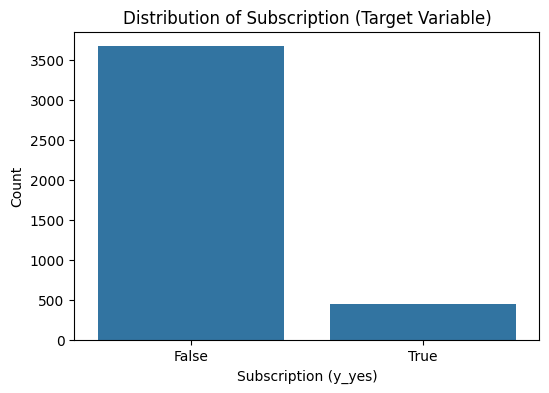

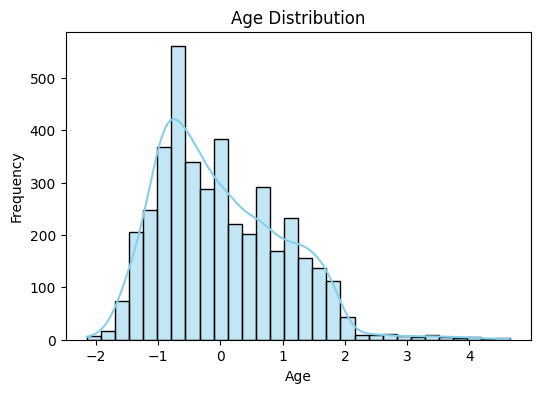

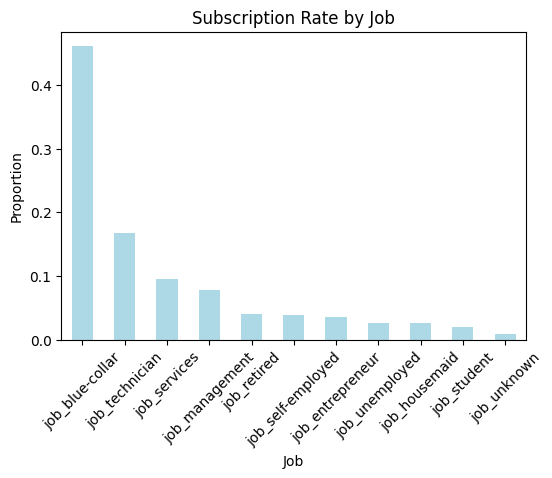

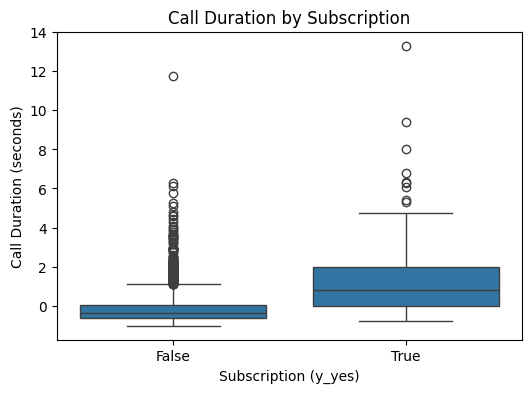

In [13]:
# Visualization 1: Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='y_yes', data=data)
plt.title('Distribution of Subscription (Target Variable)')
plt.xlabel('Subscription (y_yes)')
plt.ylabel('Count')
plt.show()

# Visualization 2: Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualization 3: Subscription Rate by Job
# Extract columns related to 'job'
job_columns = [col for col in data.columns if col.startswith('job_')]
job_subscription = data[job_columns].idxmax(axis=1).value_counts(normalize=True)

# Plot the aggregated job subscription data
plt.figure(figsize=(6, 4))
job_subscription.plot(kind='bar', color='lightblue')
plt.title('Subscription Rate by Job')
plt.xlabel('Job')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

# Visualization 5: Call Duration by Subscription
plt.figure(figsize=(6, 4))
sns.boxplot(x='y_yes', y='duration', data=data)
plt.title('Call Duration by Subscription')
plt.xlabel('Subscription (y_yes)')
plt.ylabel('Call Duration (seconds)')
plt.show()